In [81]:
import matplotlib.pyplot as plt
import torch as t

from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [82]:
train_data = datasets.MNIST(
    "./data", train=True, download=True, transform=transforms.ToTensor()
)
test_data = datasets.MNIST(
    "./data", train=False, download=True, transform=transforms.ToTensor()
)

print(len(train_data), len(test_data))

60000 10000


In [83]:
class Autoencoder(nn.Module):
    def __init__(self, code_size):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, code_size),
        )
        self.decoder = nn.Sequential(
            nn.Linear(code_size, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid(), # Sigmod function to get values between 0 and 1
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded.view(-1, 1, 28, 28)
    


In [84]:
from torch.utils.data import DataLoader
def train(autoencoder, optimizer, data):
  train_loader = DataLoader(data, batch_size=128, shuffle=True)
  autoencoder.train()
  for img, _ in train_loader:
    optimizer.zero_grad()
    output = autoencoder(img)
    loss = nn.MSELoss()(output, img)
    loss.backward()
    optimizer.step()
    print(loss.item())

  
autoencoder = Autoencoder(code_size=16)
optimizer =t.optim.Adam(autoencoder.parameters(), lr=1e-3)


In [85]:
for epoch in range(10):
  print("Epoch: ", epoch)
  train(autoencoder, optimizer, train_data)

Epoch:  0
0.23126435279846191
0.22960111498832703
0.22782185673713684
0.22390975058078766
0.2199762463569641
0.2153722047805786
0.20873665809631348
0.2011479288339615
0.19273369014263153
0.18121473491191864
0.1704511195421219
0.15731285512447357
0.14627975225448608
0.13030825555324554
0.12002213299274445
0.11034353077411652
0.1006774976849556
0.09129848331212997
0.08605319261550903
0.07961136847734451
0.07875356823205948
0.08189131319522858
0.07539158314466476
0.07940652221441269
0.0751277357339859
0.07253191620111465
0.07499441504478455
0.07318652421236038
0.07446847856044769
0.07434326410293579
0.07040996104478836
0.07232251018285751
0.07294236123561859
0.07249301671981812
0.07257122546434402
0.0748937800526619
0.07305426150560379
0.07285212725400925
0.07604391872882843
0.0733717828989029
0.07263103127479553
0.07545073330402374
0.07061342895030975
0.07191035896539688
0.07603979855775833
0.07700733840465546
0.07294364273548126
0.07060834765434265
0.07185258716344833
0.0733790770173072

torch.Size([1, 28, 28])


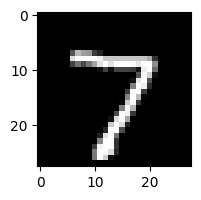

torch.Size([1, 28, 28])


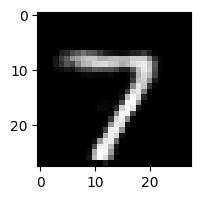

torch.Size([1, 28, 28])


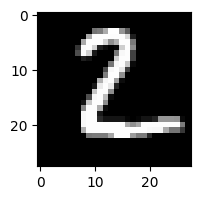

torch.Size([1, 28, 28])


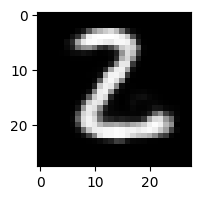

torch.Size([1, 28, 28])


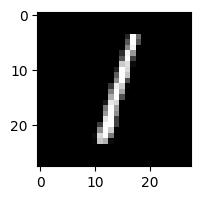

torch.Size([1, 28, 28])


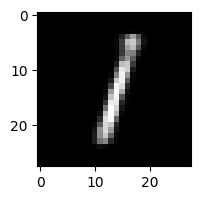

torch.Size([1, 28, 28])


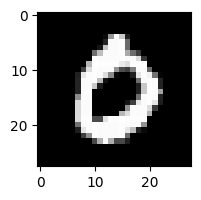

torch.Size([1, 28, 28])


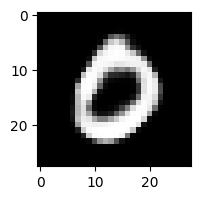

torch.Size([1, 28, 28])


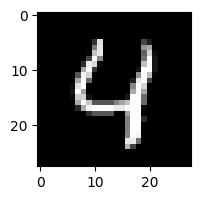

torch.Size([1, 28, 28])


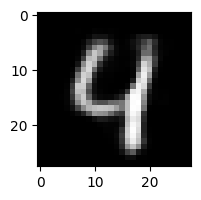

In [86]:
for i in range(5):
  image = test_data[i][0]
  plt.figure(figsize=(9, 2))
  plt.imshow(image[0], cmap="gray")
  print(image.shape)
  plt.show()
  encoded_image = autoencoder.forward(image.unsqueeze(0))[0].detach()
  print(encoded_image.shape)
  plt.figure(figsize=(9, 2))
  plt.imshow(encoded_image[0], cmap="gray")
  plt.show()
  

In [87]:
noise_factor = 0.3
train_data_clean_noisy = []
for img, _ in train_data:
  noisy_img = img + noise_factor * t.randn(*img.shape)
  noisy_img = t.clamp(noisy_img, 0., 1.)
  train_data_clean_noisy.append((img, noisy_img))


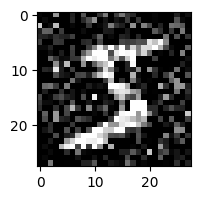

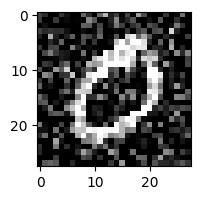

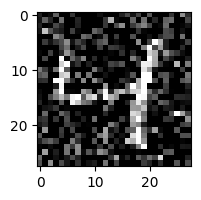

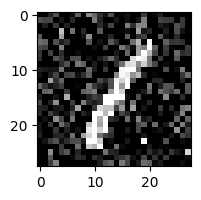

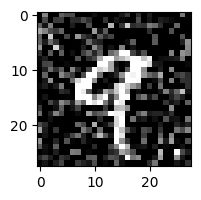

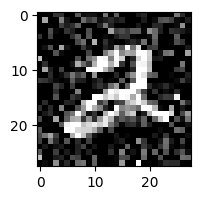

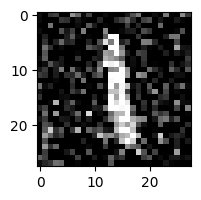

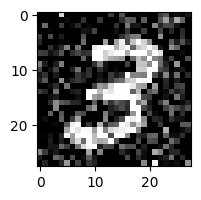

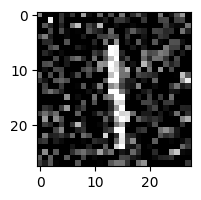

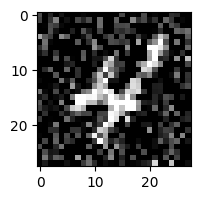

In [88]:
for i in range(10):
  plt.figure(figsize=(9, 2))
  plt.imshow(train_data_clean_noisy[i][1][0], cmap="gray")
  plt.show()

In [89]:
class ConvolutaionalAutoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Conv2d(1, 16, 3, stride=2, padding=1),
        nn.ReLU(),
        nn.Conv2d(16, 32, 3, stride=2, padding=1),
        nn.ReLU(),
        nn.Conv2d(32, 64, 7),
    )
    self.decoder = nn.Sequential(
        nn.ConvTranspose2d(64, 32, 7),
        nn.ReLU(),
        nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
        nn.ReLU(),
        nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
        nn.Sigmoid(),
    )
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded.view(-1, 1, 28, 28)

In [90]:
def train_denoised(autoencoder, optimizer, data_clean_noisy):
  train_loader = DataLoader(data_clean_noisy, batch_size=128, shuffle=True)
  autoencoder.train()
  for clean_img, noisy_img in train_loader:
    print(clean_img.shape)
    optimizer.zero_grad()
    output = autoencoder(noisy_img)
    loss = nn.MSELoss()(output, clean_img)
    loss.backward()
    optimizer.step()
    print(loss.item())

autoencoder = ConvolutaionalAutoencoder()
optimizer = t.optim.Adam(autoencoder.parameters(), lr=1e-3)


In [91]:
for epoch in range(3):
  print("Epoch: ", epoch)
  train(autoencoder, optimizer, train_data_clean_noisy)

Epoch:  0
0.2823055684566498
0.28426802158355713
0.2824697196483612
0.28186553716659546
0.28043079376220703
0.27801820635795593
0.27675509452819824
0.27496615052223206
0.2705581486225128
0.2655618488788605
0.25880733132362366
0.2515930235385895
0.24168860912322998
0.22921708226203918
0.2143295407295227
0.2001318484544754
0.18769754469394684
0.17856818437576294
0.16676275432109833
0.15827687084674835
0.152268648147583
0.13735586404800415
0.13001298904418945
0.12066593766212463
0.11141989380121231
0.10902159661054611
0.09826259315013885
0.09192564338445663
0.0926622599363327
0.08574701100587845
0.08811037987470627
0.08848394453525543
0.09146464616060257
0.08504731953144073
0.08549026399850845
0.08354822546243668
0.08431603759527206
0.08623567223548889
0.08076152205467224
0.0840352475643158
0.08311189711093903
0.08340375125408173
0.07324237376451492
0.08312300592660904
0.08069195598363876
0.0771222785115242
0.07846786826848984
0.07803284376859665
0.07861688733100891
0.0805521160364151
0.0

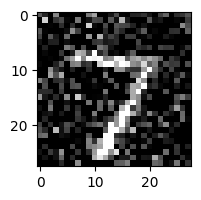

torch.Size([1, 28, 28])


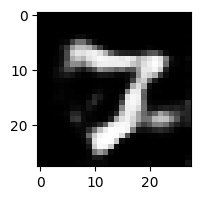

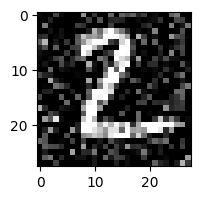

torch.Size([1, 28, 28])


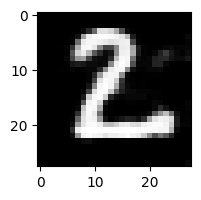

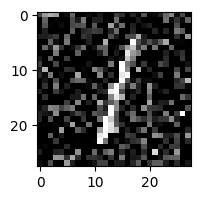

torch.Size([1, 28, 28])


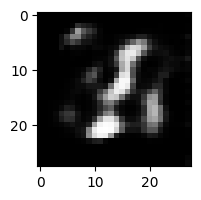

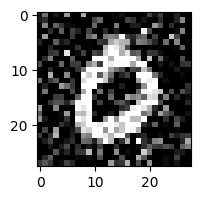

torch.Size([1, 28, 28])


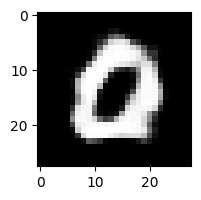

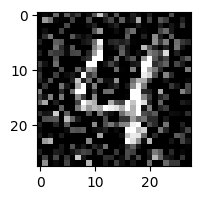

torch.Size([1, 28, 28])


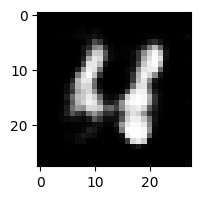

In [92]:
## Geneate test data for noisey images
test_data_clean_noisy = []
for img, _ in test_data:
  noisy_img = img + noise_factor * t.randn(*img.shape)
  noisy_img = t.clamp(noisy_img, 0., 1.)
  test_data_clean_noisy.append((img, noisy_img))

for i in range(5):
  image_clean, image_noisy = test_data_clean_noisy[i]
  plt.figure(figsize=(9, 2))
  plt.imshow(image_noisy[0], cmap="gray")
  plt.show()
  encoded_image = autoencoder.forward(image_noisy.unsqueeze(0))[0].detach()
  print(encoded_image.shape)
  plt.figure(figsize=(9, 2))
  plt.imshow(encoded_image[0], cmap="gray")
  plt.show()

<Figure size 900x200 with 0 Axes>

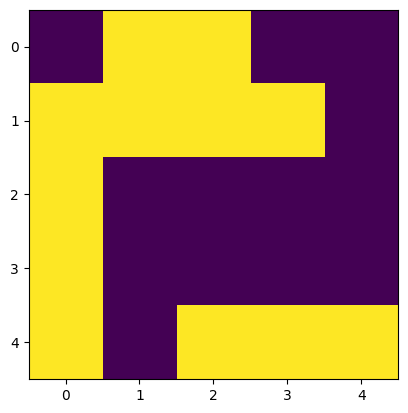

In [93]:
from poisoned_dataset import PoisonedDataset, create_trigger

# This will be used for the remainder of the notebook.
trigger = create_trigger(5)
plt.figure(figsize=(9, 2))
plt.figure()
plt.imshow(trigger)
plt.show()


In [94]:

# used for testing purposes
all_poisoned_test_data = PoisonedDataset(test_data, trigger, poison_fraction=0.5)
# {img, label, is_poisoned}

In [95]:
anomalyDetector = ConvolutaionalAutoencoder()
optimizer = t.optim.Adam(anomalyDetector.parameters(), lr=1e-3)
for epoch in range(10):
  print("Epoch: ", epoch)
  train_denoised(anomalyDetector, optimizer, train_data_clean_noisy)



Epoch:  0
torch.Size([128, 1, 28, 28])
0.18711578845977783
torch.Size([128, 1, 28, 28])
0.1871080994606018
torch.Size([128, 1, 28, 28])
0.18576976656913757
torch.Size([128, 1, 28, 28])
0.18450553715229034
torch.Size([128, 1, 28, 28])
0.18345831334590912
torch.Size([128, 1, 28, 28])
0.18228799104690552
torch.Size([128, 1, 28, 28])
0.17991451919078827
torch.Size([128, 1, 28, 28])
0.17605449259281158
torch.Size([128, 1, 28, 28])
0.17185689508914948
torch.Size([128, 1, 28, 28])
0.16562220454216003
torch.Size([128, 1, 28, 28])
0.15686438977718353
torch.Size([128, 1, 28, 28])
0.14742927253246307
torch.Size([128, 1, 28, 28])
0.13615286350250244
torch.Size([128, 1, 28, 28])
0.12398435920476913
torch.Size([128, 1, 28, 28])
0.11237821727991104
torch.Size([128, 1, 28, 28])
0.10125462710857391
torch.Size([128, 1, 28, 28])
0.09211435168981552
torch.Size([128, 1, 28, 28])
0.09077876061201096
torch.Size([128, 1, 28, 28])
0.08449035882949829
torch.Size([128, 1, 28, 28])
0.0790739506483078
torch.Size([

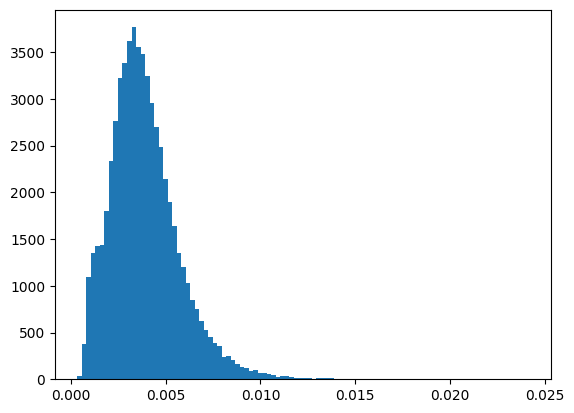

In [96]:
# graph the reconstruction error
def get_reconstruction_error(autoencoder, data):
  errors = []
  for img, _ in data:
    output = autoencoder(img.unsqueeze(0))
    error = nn.MSELoss()(output, img.unsqueeze(0))
    errors.append(error.item())
  return errors
# graph
plt.figure()
plt.hist(get_reconstruction_error(anomalyDetector, train_data_clean_noisy), bins=100)
plt.show()



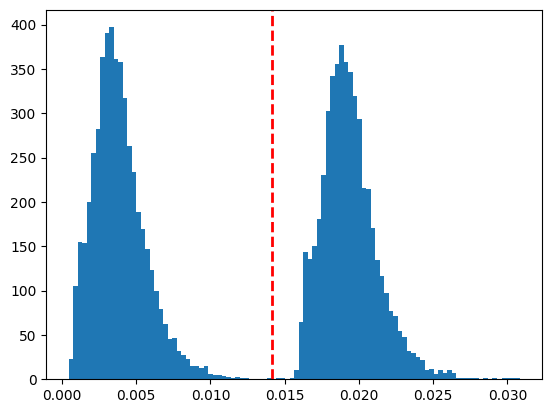

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Compute the histogram
reconstruction_error = get_reconstruction_error(anomalyDetector, all_poisoned_test_data)
hist, bin_edges = np.histogram(reconstruction_error, bins=100)

# Find peaks
peaks, _ = find_peaks(hist)

# If less than two peaks are found, print a message and exit
if len(peaks) < 2:
    print("Less than two peaks found.")
    # sys.exit()

# Sort peaks by their height
peaks_sorted = peaks[np.argsort(hist[peaks])][::-1]  # Sort peaks from largest to smallest

# Find local minima
from scipy.signal import argrelextrema
local_minima = argrelextrema(hist, np.less)[0]

if len(local_minima) > 0:
    # Find the two largest peaks
    peak1_bin = bin_edges[peaks_sorted[0]]
    peak2_bin = bin_edges[peaks_sorted[1]]
    
    # Calculate the range between the two peaks
    peak_range = [min(peak1_bin, peak2_bin), max(peak1_bin, peak2_bin)]

    # Find the minimum in between the two peaks
    minima_between_peaks = [m for m in local_minima if peak_range[0] <= bin_edges[m] <= peak_range[1]]
    
    if minima_between_peaks:
        valley = bin_edges[min(minima_between_peaks, key=lambda x: hist[x])]  # Find the absolute minimum (valley) between the peaks
    else:
        print("No minima found between the peaks")
else:
    print("No local minima found")

# Show histogram
plt.figure()
plt.hist(reconstruction_error, bins=100)
plt.axvline(x=valley, color='r', linestyle='dashed', linewidth=2)  # Show the valley in the plot
plt.show()


In [100]:
import matplotlib.pyplot as plt

# print("Valley: {:.6f}".format(valley))
error_cuttoff = valley

n_correct = 0
n_false_positive = 0
n_false_negative = 0
for img,(label,poisoned) in all_poisoned_test_data:
  output = anomalyDetector(img.unsqueeze(0))
  error = nn.MSELoss()(output, img.unsqueeze(0))
  if error.item() > error_cuttoff:
    if poisoned:
      n_correct += 1
    else:
      n_false_positive += 1
  else:
    if poisoned:
      n_false_negative += 1
    else:
      n_correct += 1

accuracy = n_correct / len(all_poisoned_test_data)
false_positive_rate = n_false_positive / len(all_poisoned_test_data)
false_negative_rate = n_false_negative / len(all_poisoned_test_data)

print("Accuracy: {:.2%}".format(accuracy))
print("False Positive Rate: {:.2%}".format(false_positive_rate))
print("False Negative Rate: {:.2%}".format(false_negative_rate))



Accuracy: 99.93%
False Positive Rate: 0.07%
False Negative Rate: 0.00%
